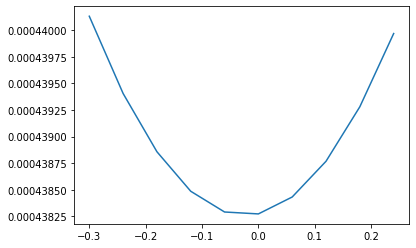

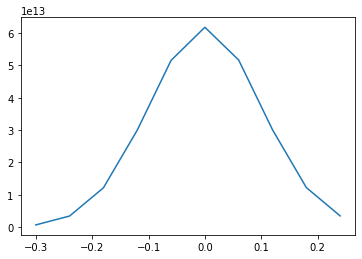

In [14]:
from rslaser import cavity
import matplotlib.pyplot as plt


#create laser cavity
lc = cavity.LaserCavity(nslice=10,L_cryst= 2, drift_right_length=2,drift_left_length=2, lens_left_focal_length = 3, lens_right_focal_length=3,n0=2,n2=0.02,sigrW=0.000437)

#output initial parameters
(lpsxvals,lpsyvals,svals) = lc.laser_pulse.rmsvals()
plt.plot(svals,lpsyvals)
plt.show()

(ivals,svals) = lc.laser_pulse.intensity_vals()
plt.plot(svals,ivals)
plt.show()

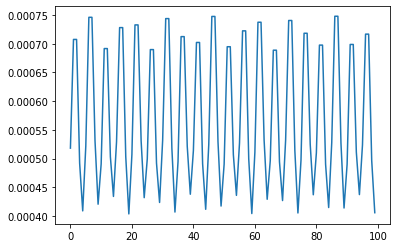

In [15]:
(sxvals,syvals) = lc.propagate(num_cycles=10)

fig, ax = plt.subplots()
ax.plot(sxvals)
plt.show()

In [13]:
sxvals

[0.0006962894759456818,
 0.0009135366555213017,
 0.0009135366539012639,
 0.0005539457559135426,
 0.00046779744158386083,
 0.0011479101807761413,
 0.0014820998311247812,
 0.001482099833954398,
 0.0008362919527142931,
 0.0005584366663756498,
 0.0017916745379206798,
 0.0023623145761108746,
 0.002362314573635625,
 0.0013604356602555468,
 0.0007188518761110133,
 0.0026599928110965904,
 0.003522578612561586,
 0.00352257860788178,
 0.0020390635856932424,
 0.001001427773628713,
 0.0037508126005362423,
 0.004747100052543717,
 0.00474710005206671,
 0.002686900688079567,
 0.0014775052415547073,
 0.00469941029875818,
 0.005628320138132838,
 0.005628320153254827,
 0.00344229857800986,
 0.001969935649944224,
 0.005211882199699033,
 0.006087564479052646,
 0.006087564464900903,
 0.0043768292571211,
 0.0023682392032218984,
 0.005412808264083249,
 0.006299926144540043,
 0.006299926142740262,
 0.005006271937901406,
 0.0028476775216929083,
 0.005385860858138636,
 0.006396925585511355,
 0.00639692560024137

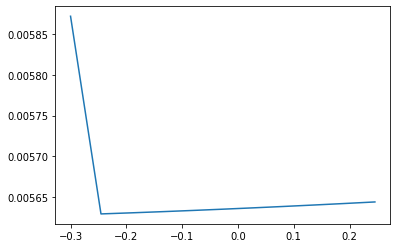

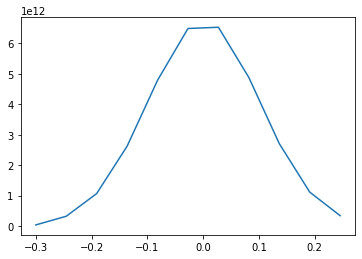

In [5]:
#output initial parameters
(lpsxvals,lpsyvals,svals) = lc.laser_pulse.rmsvals()
plt.plot(svals,lpsyvals)
plt.show()

(ivals,svals) = lc.laser_pulse.intensity_vals()
plt.plot(svals,ivals)
plt.show()